## MENA Devs Survey (2017) Analysis

This is a draft and a work in progress. Treat it and the results as such.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [3]:
raw_data_file = "../raw_data/MD_Survey-29062017.csv"
data = pd.read_csv(raw_data_file, sep=",", index_col=0)

### Restrict the analysis to Lebanese survey respondants

In [4]:
data = data[data['in_lebanon'] == 1]

### Gender Distribution

In [5]:
[
    {'Male': len(data[data['gender'] == 'Male'].index)},
    {'Female': len(data[data['gender'] == 'Female'].index)},
    {'No_Share':len(data[data['gender'] == 'I prefer not to share'].index)},
    {'Other':len(data[data['gender'] == 'Other'].index)}
]

[{'Male': 89}, {'Female': 7}, {'No_Share': 2}, {'Other': 1}]

### Age Distribution

In [6]:
age_distribution = pd.DataFrame(data['age_group'].value_counts())
age_distribution

,age_group
25 - 30,44
31 - 40,25
20 - 24,23
< 20,5
> 40,2


### Occupations Distribution

In [7]:
data['occupation'].value_counts()

Full-stack Web Developer                                14
Executive (VP of Eng., CTO, CIO, etc.)                  14
Software Developer                                       9
Back-end Web Developer                                   9
Mobile Developer (iOS)                                   8
Software Engineer                                        8
Mobile Developer (Android)                               7
Freelancer                                               5
Mobile Developer                                         4
Front-End Web Developer                                  4
Technical Manager                                        3
Technical Director                                       3
Student                                                  3
Data Scientist                                           2
self-employed                                            1
Trainer/Teacher                                          1
IT Support                                              

### Age / Experience / Salary

In [8]:
# Average Age
def averageAge(input):
    x = input.split(' - ')
    if (len(x) > 1):
        return np.average([int(x[0]), int(x[1])])
    return int(input[-2:])

data['age_group'] = data['age_group'].map(lambda x: averageAge(x))

# Average Salary
def averageSalary(input):
    x = input.split('-')
    if (len(x) > 1):
        return np.average([int(x[0]), int(x[1])])
    return int(input[:-1]) if (input[-1:] == '+') else int(input)

data['salary_range'] = data['salary_range'].map(lambda x: averageSalary(x))

# Average Experience
def averageExp(input):
    x = input.split('-')
    if (len(x) > 1):
        return np.average([int(x[0]), int(x[1])])
    return int(input[:-1]) if (input[-1:] == '+') else int(input)

data['experience_range'] = data['experience_range'].map(lambda x: averageExp(x))

age_mean = pd.DataFrame(data[['age_group', 'occupation']].groupby('occupation')['age_group'].mean())
salary_mean = pd.DataFrame(data[['salary_range', 'occupation']].groupby('occupation')['salary_range'].mean())
exp_mean = pd.DataFrame(data[['experience_range', 'occupation']].groupby('occupation')['experience_range'].mean())
salary_age_matrix = age_mean.join(salary_mean).sort_values(by='salary_range', ascending=False)
salary_age_matrix['experience'] = exp_mean
salary_age_matrix['monthly_salary'] = salary_mean['salary_range'].map(lambda x: x/12)
salary_age_matrix['frequency'] = data[['age_group', 'occupation']].groupby('occupation')['age_group'].count()
# Output --
salary_age_matrix[salary_age_matrix['frequency'] > (116/17)]

,age_group,salary_range,experience,monthly_salary,frequency
occupation,,,,,
"Executive (VP of Eng., CTO, CIO, etc.)",33.392857,58928.571429,9.071429,4910.714286,14
Full-stack Web Developer,26.964286,28571.428571,5.535714,2380.952381,14
Software Engineer,27.125000,24375.000000,5.125000,2031.250000,8
Mobile Developer (Android),26.714286,24285.714286,4.642857,2023.809524,7
Mobile Developer (iOS),25.437500,23750.000000,3.500000,1979.166667,8
Software Developer,24.722222,22777.777778,3.444444,1898.148148,9
Back-end Web Developer,28.333333,20000.000000,3.222222,1666.666667,9


### Education Level / Salary

In [9]:
education_salary_mean = pd.DataFrame(data[['salary_range', 'education_level']].groupby('education_level')['salary_range'].mean())
education_salary_mean = education_salary_mean.sort_values(by='salary_range', ascending=False)
education_salary_mean

,salary_range
education_level,
PhD,45000.000000
Masters Degree,37333.333333
University Degree,27807.017544
High School Degree,21250.000000
Middle School Degree,0.000000


### Operating System / Salary

In [10]:
os_salary_mean = pd.DataFrame(data[['salary_range', 'OS']].groupby('OS')['salary_range'].mean())
os_salary_mean = os_salary_mean.sort_values(by='salary_range', ascending=False)
os_salary_mean

,salary_range
OS,
macOS,33981.481481
Windows,26896.551724
Linux,21875.000000


### Job Satisfaction / Salary

In [11]:
job_satis_mean = pd.DataFrame(data[['salary_range', 'job_satisfaction']].groupby('job_satisfaction')['salary_range'].mean())
job_satis_mean = job_satis_mean.sort_values(by='salary_range', ascending=False)
job_satis_mean['frequency'] = data[['salary_range', 'job_satisfaction']].groupby('job_satisfaction')['salary_range'].count()
job_satis_mean

,salary_range,frequency
job_satisfaction,,
4,85000.000000,1
1,50000.000000,2
8,33333.333333,21
11,32000.000000,20
10,30000.000000,13
2,28333.333333,3
7,27500.000000,12
9,26538.461538,13
6,23000.000000,10


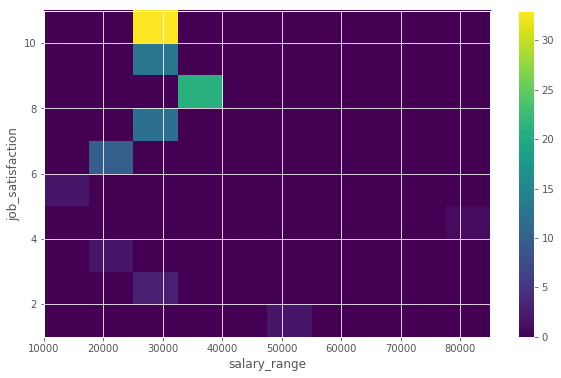

In [12]:
plt.figure(figsize=(10,6), facecolor='white')
plt.xlabel('salary_range')
plt.ylabel('job_satisfaction')
plt.hist2d(job_satis_mean['salary_range'], job_satis_mean.index, weights=job_satis_mean['frequency'])
plt.colorbar()
plt.show()

### Experience / Job Satisfaction

In [13]:
exp_satis_mean = pd.DataFrame(data[['experience_range', 'job_satisfaction']].groupby('experience_range')['job_satisfaction'].mean())
exp_satis_mean

,job_satisfaction
experience_range,
0.5,9.066667
1.5,8.071429
4.0,7.259259
8.0,8.478261
11.0,8.350000


### Female / Male Salaries

In [14]:
female_roles = pd.DataFrame(data[data['gender'] == 'Female'].groupby('occupation')['salary_range'].mean())

male_roles = data[data['gender'] == 'Male'].groupby('occupation')['salary_range'].mean()
male_roles = pd.DataFrame(male_roles[female_roles.index])

female_roles.join(male_roles, lsuffix="_female", rsuffix='_male')

,salary_range_female,salary_range_male
occupation,,
CEO,90000.0,NaN
"Executive (VP of Eng., CTO, CIO, etc.)",25000.0,61538.461538
Mobile Developer,15000.0,30000.000000
Mobile Developer (Android),35000.0,22500.000000
Mobile Developer (iOS),20000.0,25000.000000
Software Developer,10000.0,24375.000000


### Job Board Interest

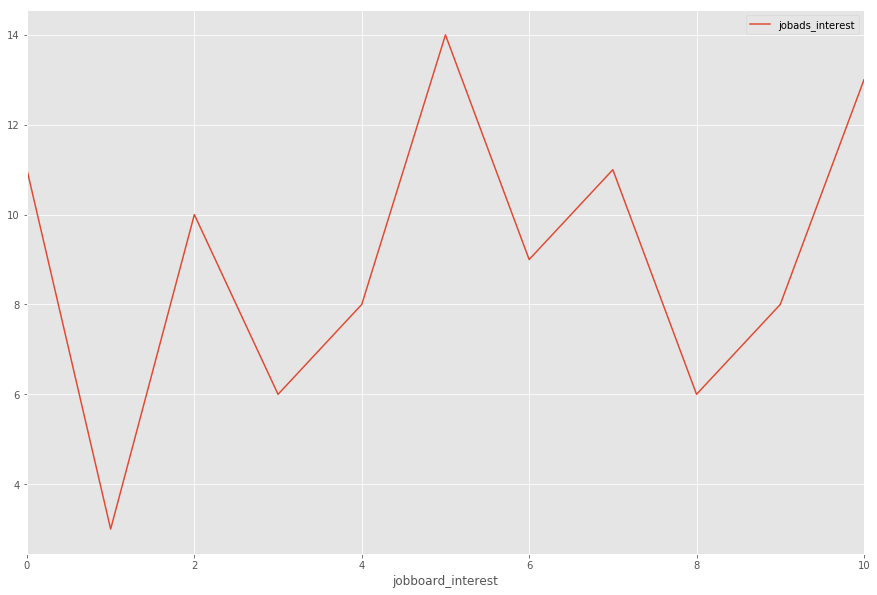

In [35]:
jb_interest = pd.DataFrame(data.groupby('jobboard_interest')['jobboard_interest'].count())
jb_interest.columns = ['jobads_interest']
jb_interest.plot(kind='line', figsize=(15, 10))

# plt.scatter(jb_interest.index, jb_interest['jobboard_interest'].values, alpha=0.5)

### Startup Partnership Interests

In [37]:
startup_interest = pd.DataFrame(data.groupby('startup_interest')['startup_interest'].count())
startup_interest.columns = ['interest_count']
startup_interest

,interest_count
startup_interest,
0,27
1,72


### Salary / Experience / Company Size

In [38]:
company_salary = pd.DataFrame(data[['occupation', 'salary_range', 'company_size', 'experience_range']].groupby(['occupation', 'experience_range', 'company_size'])['salary_range'].mean())
company_salary

salary_range
occupation                                         experience_range company_size                        
Back-end Web Developer                             0.5              31 - 60 people          10000.000000
                                                                    61 - 100 people         15000.000000
                                                   1.5              14 - 30 people          15000.000000
                                                                    31 - 60 people          15000.000000
                                                                    5 - 9 people            15000.000000
                                                   4.0              5 - 9 people            25000.000000
                                                   8.0              61 - 100 people         35000.000000
                                                   11.0             1 - 4 people            35000.000000
CEO                                                11.0             5 - 9 people            90000.000000
Data Scientist                                     1.5              61 - 100 people         25000.000000
                                                   8.0              61 - 100 people         35000.000000
Executive (VP of Eng., CTO, CIO, etc.)             4.0              1 - 4 people            25000.000000
                                                                    10 - 14 people          35000.000000
                                                                    5 - 9 people            85000.000000
                                                   8.0              31 - 60 people          55000.000000
                                                                    5 - 9 people            15000.000000
                                                   11.0             10 - 14 people          82500.000000
                                                                    101 - 500 people        72500.000000
                                                                    14 - 30 people          51666.666667
                                                                    5 - 9 people            72500.000000
Freelancer                                         1.5              I'm not part of a team  35000.000000
                                                   8.0              I'm not part of a team  30000.000000
                                                   11.0             1 - 4 people            45000.000000
                                                                    I'm not part of a team      0.000000
Front-End Web Developer                            0.5              14 - 30 people          15000.000000
                                                                    5 - 9 people            15000.000000
                                                                    61 - 100 people         15000.000000
                                                   1.5              5 - 9 people                0.000000
Full-stack Web Developer                           0.5              31 - 60 people          15000.000000
                                                   1.5              14 - 30 people          25000.000000
...                                                                                                  ...
Mobile Developer (iOS)                             4.0              14 - 30 people          25000.000000
                                                                    31 - 60 people          25000.000000
                                                   8.0              14 - 30 people          15000.000000
                                                                    61 - 100 people         45000.000000
Project Manager - Mobile Lead                      8.0              14 - 30 people          25000.000000
Software Developer                                 0.5              31 - 60 people          15000.0000